# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

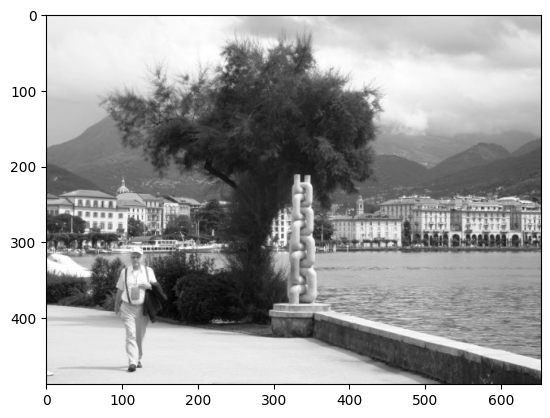

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

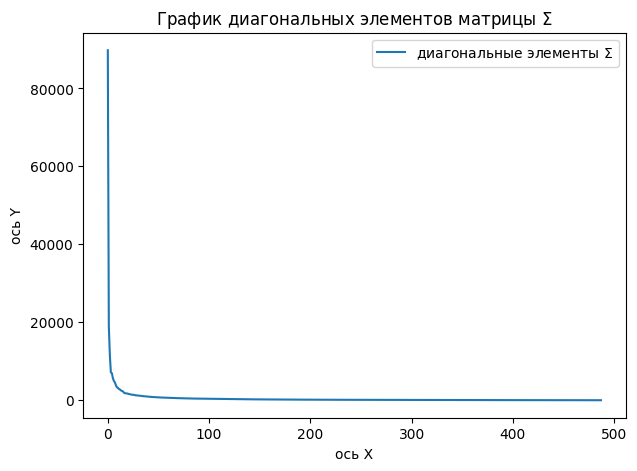

In [6]:
plt.figure(figsize=(7, 5))
plt.ylabel('ось Y')
plt.xlabel('ocь X')
plt.title("График диагональных элементов матрицы $\Sigma$") 

plt.plot(S, label="диагональные элементы $\Sigma$")
plt.legend()
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

Text(0.5, 1.0, 'Первая компонента ранга 1')

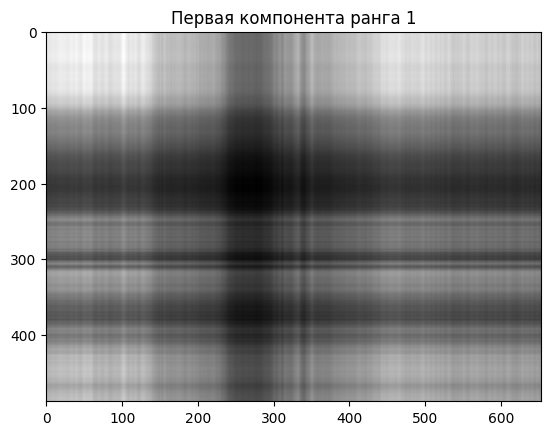

In [7]:
U_values = U[:, range(0, 1)]
S_values = np.diag(S)[0:1, 0:1]
VT_values = VT[range(0, 1), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Первая компонента ранга 1")

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Text(0.5, 1.0, 'Сумма компонент с 1 по 20')

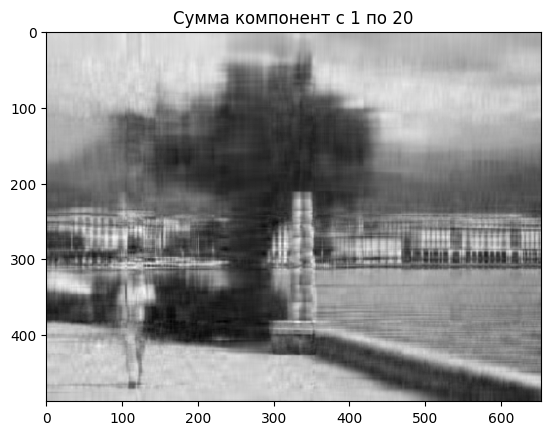

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U_values = U[:, range(0, 20)]
S_values = np.diag(S)[0:20, 0:20]
VT_values = VT[range(0, 20), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 1 по 20")

Text(0.5, 1.0, 'Сумма компонент с 1 по 50')

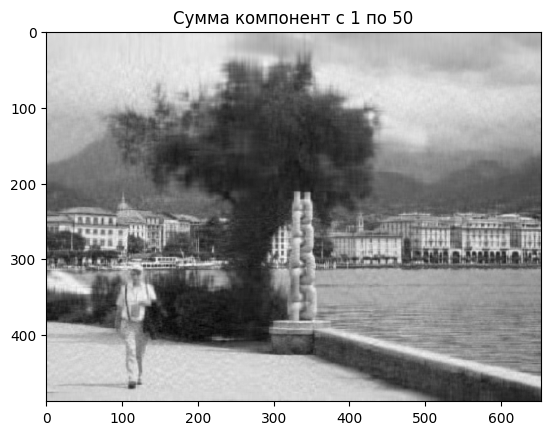

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U_values = U[:, range(0, 50)]
S_values = np.diag(S)[0:50, 0:50]
VT_values = VT[range(0, 50), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 1 по 50")

Text(0.5, 1.0, 'Сумма компонент с 20 по 100')

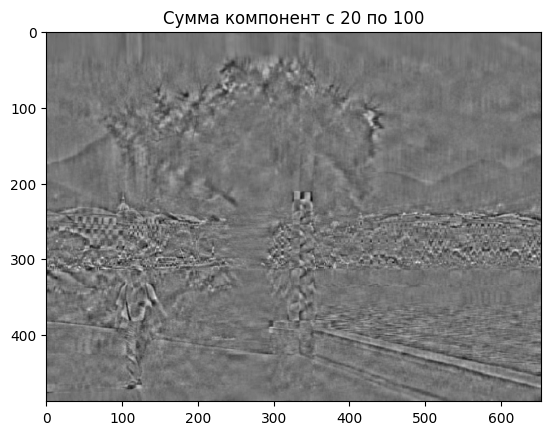

In [16]:
U_values = U[:, range(19, 100)]
S_values = np.diag(S)[19:100, 19:100]
VT_values = VT[range(19, 100), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 20 по 100")

Text(0.5, 1.0, 'Сумма компонент с 20 по последнюю')

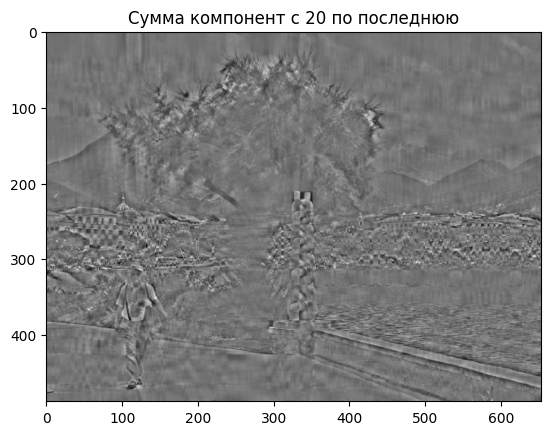

In [17]:
U_values = U[:, 19:]
S_values = np.diag(S)[19:, 19:]
VT_values = VT[19:, :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 20 по последнюю")

Можно заметить, что, если взять сумму компонент до 20 и до 50, то этого достаточно, чтобы понять, что изображено на картинке. Чем больше компонент мы учитываем в сумме, тем более подробно прорисовывается картинка. \\
Вывод: для того, чтобы понять, что в целом происходит на картинке достаточно лишь суммы нескольких первых компонент. Дополнительные компоненты влияют на прорисовку дополнительных мелких элементов.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Как мы уже заметили, компоненты 1-20 и 1-50 дают достаточно восстанавливают целостный образ изображения (чтобы было в целом понятно, что происходит на картинке). \\
Можно рассмотреть несколько значений и сделать вывод:

Text(0.5, 1.0, 'Сумма компонент с 1 по 100')

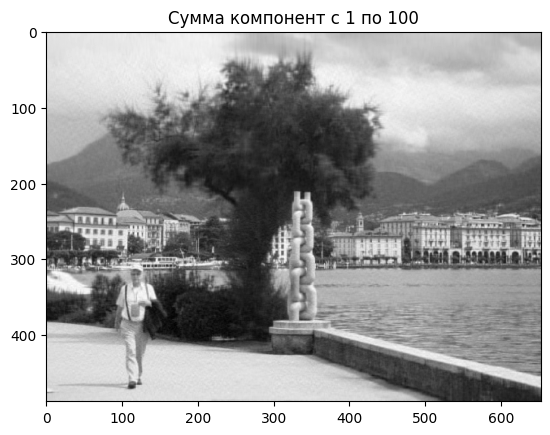

In [20]:
U_values = U[:, range(0, 100)]
S_values = np.diag(S)[0:100, 0:100]
VT_values = VT[range(0, 100), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 1 по 100")

Text(0.5, 1.0, 'Сумма компонент с 1 по 150')

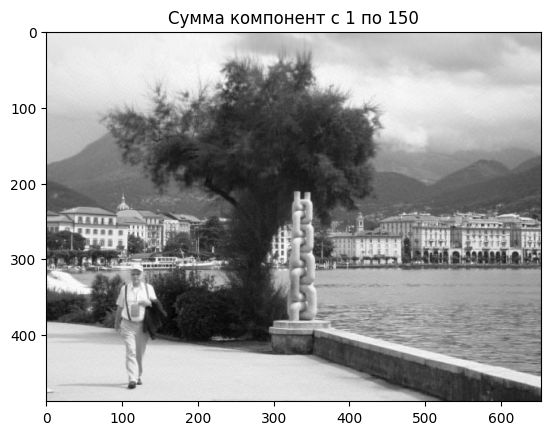

In [21]:
U_values = U[:, range(0, 150)]
S_values = np.diag(S)[0:150, 0:150]
VT_values = VT[range(0, 150), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 1 по 150")

Возьмем среднее значение между этими значениями (100+150):2 = 125

Text(0.5, 1.0, 'Сумма компонент с 1 по 125')

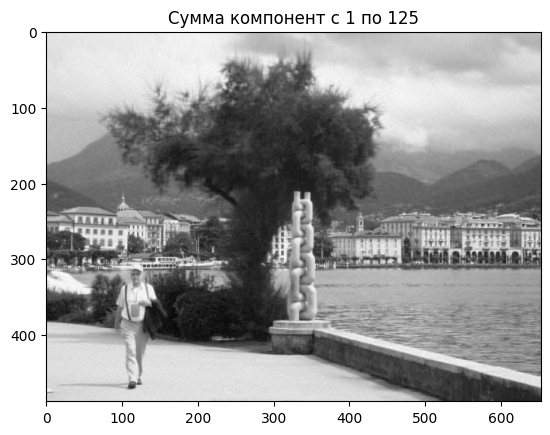

In [23]:
U_values = U[:, range(0, 125)]
S_values = np.diag(S)[0:125, 0:125]
VT_values = VT[range(0, 125), :] #V транспонированная

A_values = U_values @ S_values @ VT_values

imgplot = plt.imshow(A_values, cmap='gray')
plt.title("Сумма компонент с 1 по 125")

Сравним с исходным изображением:


Text(0.5, 1.0, 'Исходное изображение')

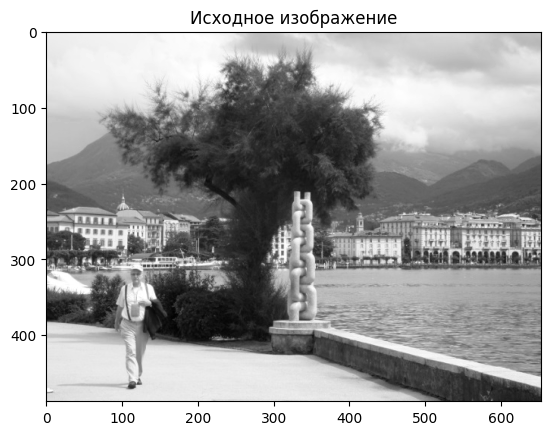

In [24]:
imgplot = plt.imshow(img, cmap='gray')
plt.title("Исходное изображение")

Визуально видно, что компонент 1-125 достаточно для того, чтобы хорошо восстановить исходное изображение. \\
Попробуем провести более содержательный анализ, исходя из расхода памяти: на хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$. Так как мы взяли не все компоненты, а только до 125, то мы очевидно затратили меньше памяти.

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

Найдем размеры исходного изображения и подставим их в формулы, приведенные выше:

In [25]:
U_size = U.shape
S_size = S.shape
VT_size = VT.shape

print(U_size, S_size, VT_size)

(488, 488) (488,) (488, 653)


Значит, m = 488, n = 653. \\
Хранение исходной картинки: $m\times n$ = $488\times 653$ = 318664 \\
Хранение отдельно: $r(m + n + 1)$ = $125(488 + 653 + 1)$ = 142750 \\ 
318664/142750 = 2,23 \\
По теоретическим рассчетам будет затрачено в 2,23 раза меньше памяти

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [26]:
fact_res = U.nbytes + S.nbytes + VT.nbytes 
teor_res = U_values.nbytes + S_values.nbytes + VT_values.nbytes 

print(fact_res)
print(teor_res)
print(fact_res/teor_res)

4458368
1266000
3.5216176935229067


Результат согласуется с тем, что мы получили в преыдущем пункте. Фактически, мы сохранили даже больше памяти, чем посчитали теоритечски. 

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

1. Докажем $$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$$ \\

Если представить вектор $w = \alpha \cdot v$, где $|v|=1$. Тогда
$$\frac{|Xw|}{|w|} = \frac{|X\alpha v|}{|\alpha v|} = |Xv|.$$

Заметим также, что по определению сингулярного числа $\sigma_1$ имеем:
$$\sigma_1 = \mathrm{max}_{\substack{u, v \\ |u|=|v|=1}} |Xu \cdot v|.$$

Рассмотрим теперь выражение $\frac{|Xw|}{|w|}$ как функцию от $\alpha$:
$$f(\alpha) = \frac{|Xw|}{|w|} = \frac{|\alpha Xv|}{|\alpha v|} = |Xv|.$$

Таким образом, если мы найдем такой вектор $v$, при котором $|Xv| = \sigma_1$, то мы сможем подставить $w = \alpha \cdot v$ в выражение $\frac{|Xw|}{|w|}$ и получить максимальное значение, т.е. $\sigma_1$. Для этого заметим, что максимум $\mathrm{max}_{\substack{u, v \\ |u|=|v|=1}} |Xu \cdot v|$ достигается на собственных векторах матрицы $X^TX$, т.е. векторах $v$, соответствующих наибольшему собственному значению матрицы $X^TX$. Пусть это значение равно $\lambda$, тогда $|Xv|^2 = v^TX^TXv = \lambda v^Tv = \lambda$, т.е. $|Xv| = \sqrt{\lambda}$. Таким образом, мы нашли вектор $v$ такой, что $|Xv| = \sqrt{\lambda} = \sigma_1$, и можем подставить $w = \alpha \cdot v$ в выражение $\frac{|Xw|}{|w|}$, получив $\sigma_1$ как максимум этой функции.

Итак, мы доказали, что $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$.

Пусть $w\neq 0$ — некоторый вектор. Рассмотрим отношение $|Xw|/|w|$. Заметим, что оно достигает максимума тогда и только тогда, когда $Xw$ и $w$ коллинеарны, то есть когда $w$ — это какой-то собственный вектор матрицы $X^TX$. Обозначим этот вектор за $v$. Тогда $Xw$ — это собственный вектор матрицы $X^TX$, соответствующий собственному значению $\sigma_1^2$. Таким образом, $Xw = \sigma_1 v$. Отсюда $\frac{|Xw|}{|w|} = \frac{|\sigma_1 v|}{|w|} = \sigma_1\cdot\frac{|v|}{|w|}$. Максимум достигается при $w = \alpha v$, где $\alpha$ — некоторая константа. Тогда $\frac{|Xw|}{|w|} = \sigma_1$.


2. Докажем $$\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$$ \\
Рассмотрим выражение $wX^TXw$. Представим вектор $w$ в виде линейной комбинации собственных векторов матрицы $X^TX$: $w = \sum_{i=1}^n \alpha_i v_i$, где $v_i$ — собственные векторы матрицы $X^TX$, а $\alpha_i$ — некоторые коэффициенты. Заметим, что $X^TXv_i = \sigma_i^2 v_i$, где $\sigma_i$ — сингулярные числа матрицы $X$. Тогда

$$wX^TXw = \sum_{i,j}\alpha_i\alpha_j v_i^T X^TX v_j = \sum_{i=1}^n\alpha_i^2 \sigma_i^2.$$

При этом $\sum_{i=1}^n \alpha_i^2 = |w|^2 = 1$, так как $w$ — единичный вектор. Таким образом, мы получили, что $wX^TXw = \sum_{i=1}^n\alpha_i^2 \sigma_i^2 \leq \sigma_1^2$, причем равенство достигается тогда и только тогда, когда $w$ — это собственный вектор матрицы $X^TX$, соответствующий собственному значению $\sigma_1^2$. Значит, $\mathrm{max}_{|w|=1}~|Xw| = \sigma_1$.



3. Докажем $$\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$ \\
Разложим векторы $u$ и $v$ в линейную комбинацию столбцов матриц $U$ и $V$:

$$u = Ua, \quad v = Vb,$$

где $a$ и $b$ — некоторые векторы в $\mathbb{R}^m$ и $\mathbb{R}^n$ соответственно, причем $|a| = |b| = 1$. Тогда

$$u^TXv = a^TU^TXVb = a^T\Sigma b.$$

Заметим, что $\Sigma$ — это диагональная матрица с сингулярными числами на диагонали. Тогда $a^T\Sigma b = \sum_{i=1}^n \sigma_i a_ib_i \leq \sigma_1$, причем равенство достигается тогда и только тогда, когда $a$ и $b$ соответствуют первым сингулярным векторам. Таким образом, $\mathrm{max}_{|u|=|v|=1}~|u^TXv|=\sigma_1$.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Заметим, что $a_{ij}=-a_{(n-i)j}=-a_{i(n-j)}=a_{(n-i)(n-j)}$, т.е. матрица $A$ симметрична относительно главной диагонали и относительно побочной диагонали. Также заметим, что $\sin i$ и $\cos j$ неотрицательны для всех $i,j$, поэтому все элементы матрицы $A$ неотрицательны.

Рассмотрим подматрицу $B$ матрицы $A$, состоящую из первых $k$ строк и первых $k$ столбцов. Заметим, что эта подматрица является матрицей Грама системы векторов $\{\vec{v}_0,\ldots,\vec{v}_{k-1}\}$, где $\vec{v}_i = (\sin i, \cos 0, \ldots, \cos (k-1))$. Действительно, элемент $b_{ij}$ матрицы $B$ равен скалярному произведению векторов $\vec{v}_i$ и $\vec{v}_j$. Так как $\sin i \geqslant 0$ и $\cos j \geqslant 0$, то все элементы матрицы $B$ неотрицательны.

Заметим также, что векторы $\vec{v}_i$ линейно независимы. Действительно, пусть $\sum_{i=0}^{k-1} c_i \vec{v}_i = \vec{0}$, тогда $\sum_{i=0}^{k-1} c_i \sin i = 0$ и $\sum_{i=0}^{k-1} c_i \cos j = 0$ для всех $j=0,\ldots,k-1$. Рассмотрим многочлен $p(x) = \sum_{i=0}^{k-1} c_i \sin i \cdot x^i$. Он имеет $k$ корней $\cos 0,\ldots,\cos (k-1)$, поэтому он должен быть тождественно равен нулю. Но это возможно только если все коэффициенты $c_i$ равны нулю, так как функции $\sin i \cdot x^i$ линейно независимы.

Итак, мы получили, что матрица $B$ неотрицательна и имеет ранг $k$. Следовательно, её можно разложить в виде $B = U_k \Sigma_k (V_k)^T$, где $U_k$ и $V_k$ — матрицы с ортонормированными столбцами размера $k \times k$, а $\Sigma_k$ — диагональная матрица размера $k \times k$, в которой $\sigma_1 \geqslant \ldots \geqslant \sigma_k > 0$. Так как матрица $B$ симметрична, то $U_k = V_k$.

Теперь рассмотрим матрицу $A$. Заметим, что она может быть получена из матрицы $B$ путём заполнения нижней правой части нулями. То есть, $A = \begin{pmatrix} B & \vec{0} \\ \vec{0}^T & \vec{0}^T \end{pmatrix}$, где $\vec{0}$ — вектор-столбец размера $n-k$. Так как матрица $B$ имеет ранг $k$, то матрица $A$ имеет ранг не больше $k$.

С другой стороны, заметим, что векторы $\vec{v}_i$ из определения матрицы $B$ можно продолжить до ортонормированного базиса в $\mathbb{R}^n$ путём добавления векторов $\vec{w}_i = (\vec{0}, \ldots, \vec{0}, \sin (i+k), \cos (i+k), \ldots, \cos (n-1))$, где $\vec{0}$ означает нулевой вектор размера $k$. Таким образом, мы получили ортонормированный базис $\{\vec{v}_0,\ldots,\vec{v}_{k-1},\vec{w}_0,\ldots,\vec{w}_{n-k-1}\}$ в $\mathbb{R}^n$. В этом базисе матрица $A$ имеет блочно-диагональный вид $\begin{pmatrix} B & \vec{0} \\ \vec{0}^T & \vec{0}^T \end{pmatrix}$, где $B$ имеет размер $k \times k$.

Таким образом, мы получили, что матрица $A$ имеет ранг $k$ и она может быть разложена в виде $A = U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n \times k$, а $\Sigma$ — диагональная матрица размера $k \times k$, в которой $\sigma_1 \geqslant \ldots \geqslant \sigma_k > 0$.

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Заметим, что $\text{Im}\mathcal{A} = \{Ax \mid x \in \mathbb{R}^n\}$ совпадает с линейной оболочкой столбцов матрицы $A$. Действительно, пусть $a_1,\ldots,a_n$ — столбцы матрицы $A$. Тогда для любого вектора $x \in \mathbb{R}^n$ выполнено $\mathcal{A}(x) = Ax = \sum_{i=1}^n x_i a_i$, то есть $\text{Im}\mathcal{A} = \langle a_1,\ldots,a_n \rangle$.

По определению сингулярного разложения, столбцы матрицы $U$ образуют ортонормированный базис в $\text{Im}\mathcal{A}$, состоящий из собственных векторов матрицы $AA^T$. Более того, столбцы $u_1,\ldots,u_r$ соответствуют наибольшим собственным значениям матрицы $AA^T$. Следовательно, $\text{Im}\mathcal{A} = \langle u_1,\ldots,u_r \rangle$.

Для доказательства второго утверждения заметим, что $\text{Ker}\mathcal{A} = \{x \in \mathbb{R}^n \mid Ax = \vec{0}\}$ совпадает с пространством решений однородной системы линейных уравнений $Ax = \vec{0}$. Так как $r = \text{rk}A$, то ранг матрицы $A$ равен $r$, а значит, число главных переменных в этой системе равно $n-r$.

Пусть $v_1,\ldots,v_n$ — столбцы матрицы $V$. Тогда для любого вектора $x \in \mathbb{R}^n$ выполнено $Ax = \sum_{i=1}^n x_i Av_i = \sum_{i=1}^r x_i \sigma_i u_i$. Значит, $x$ является решением системы $Ax = \vec{0}$ тогда и только тогда, когда $x_1 = \ldots = x_r = 0$, то есть когда $x$ лежит в линейной оболочке векторов $v_{r+1},\ldots,v_n$. Следовательно, $\text{Ker}\mathcal{A} = \langle v_{r+1},\ldots,v_n \rangle$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Заметим, что матрица $P$ является проектором на подпространство, порожденное столбцами матрицы $A$. Действительно, для любого вектора $x \in \mathbb{R}^m$ имеем
$$Px = A(A^T A)^{-1} A^T x,$$
где вектор $A^T x$ лежит в подпространстве, порожденном столбцами $A$, а выражение $A(A^T A)^{-1} A^T$ действует как проектор на это подпространство.

Так как столбцы матрицы $A$ линейно независимы, то матрица $A^T A$ является положительно определенной, и ее обратная матрица $(A^T A)^{-1}$ существует. Тогда матрица $P$ имеет следующий вид:
$$P = A(A^T A)^{-1} A^T = U \Sigma V^T (V \Sigma U^T U \Sigma V^T)^{-1} V \Sigma U^T = U \Sigma V^T (\Sigma^2)^{-1} V \Sigma U^T,$$
где $U$ и $V$ — ортогональные матрицы, а $\Sigma$ — диагональная матрица, на диагонали которой стоят сингулярные числа матрицы $A$. Таким образом, мы получили полное сингулярное разложение матрицы $P$ с матрицами $U$, $V$ и $\Sigma$.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


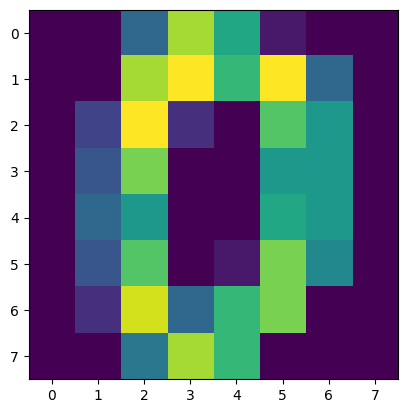

In [27]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [28]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

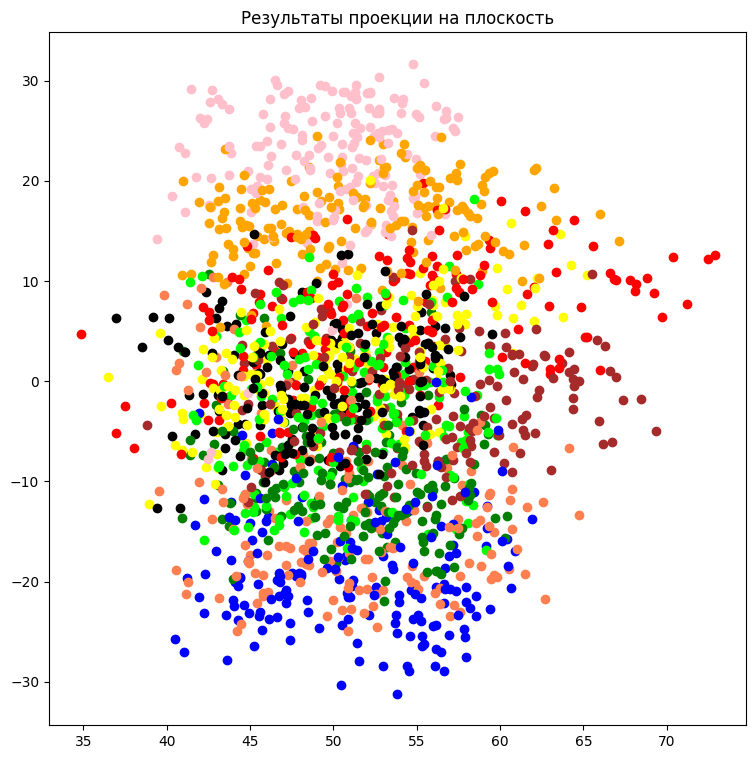

In [32]:
US = U @ np.diag(S)
US_value = US[:, [0,1]]
#создадим массив цветов
colors = np.array(['yellow', 'red', 'green', 'blue', 'pink', 'lime', 'orange', 'black', 'brown', 'coral'])

#построим график
plt.figure(figsize = (9,9))
plt.title('Результаты проекции на плоскость')

#сделаем так, чтобы точки окрашивались в разные цвета
for i in range(US_value.shape[0]):
    plt.scatter(US_value[i, 0], US_value[i, 1] , c = colors[digits.target[i]])

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

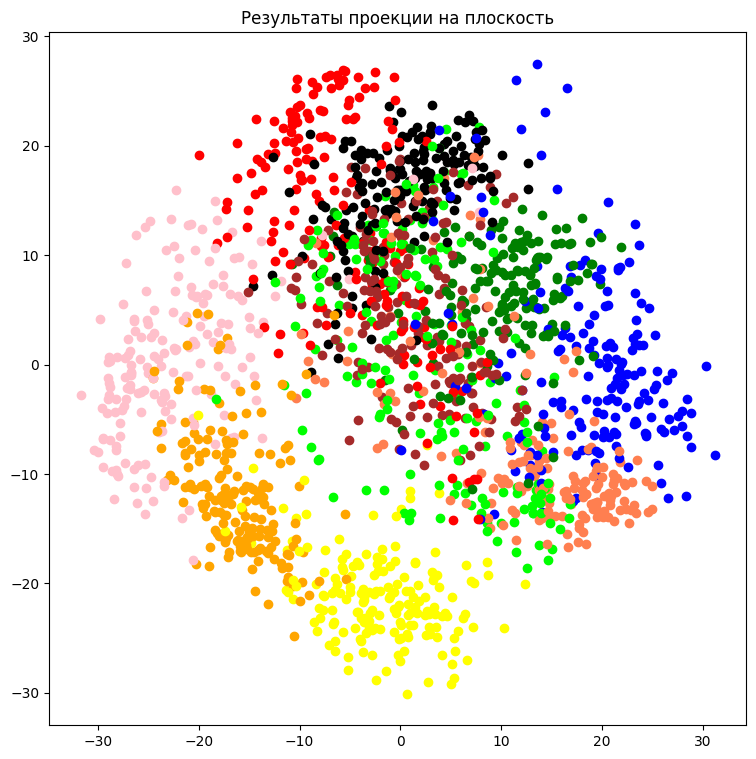

In [34]:
data_mean = digits.data.mean(axis = 0) 
new_data = digits.data - data_mean
U, S, VT = svd(new_data, full_matrices=False)

US = U @ np.diag(S)
US_value = US[:, [0,1]]

plt.figure(figsize = (9,9))
plt.title('Результаты проекции на плоскость')
colors = np.array(['yellow', 'red', 'green', 'blue', 'pink', 'lime', 'orange', 'black', 'brown', 'coral'])

for i in range(US_value.shape[0]):
    plt.scatter(US_value[i, 0], US_value[i, 1] , c = colors[digits.target[i]])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

На первом графике точки одинаковых цветов расположены хаотично и накладываются друг на друга. На втором графике точки одного цвета расположены ближе друг к другу, более сгруппированно.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [35]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<ipython-input-36-56259113fdad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-36-56259113fdad>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-36-56259113fdad>:14: UserWarning: 

`distplot` is a

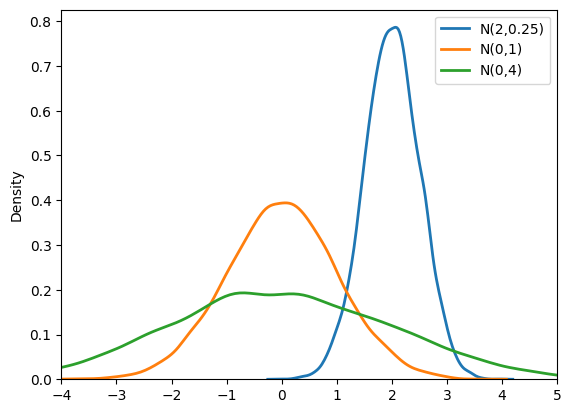

In [36]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<ipython-input-37-977a259a630c>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s, shade=False, color='g')


<Axes: ylabel='Density'>

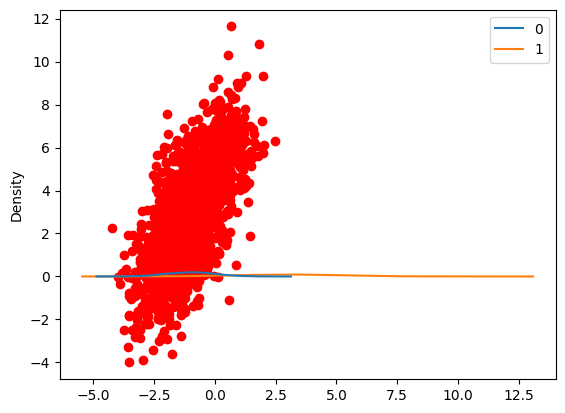

In [37]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s, shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [38]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

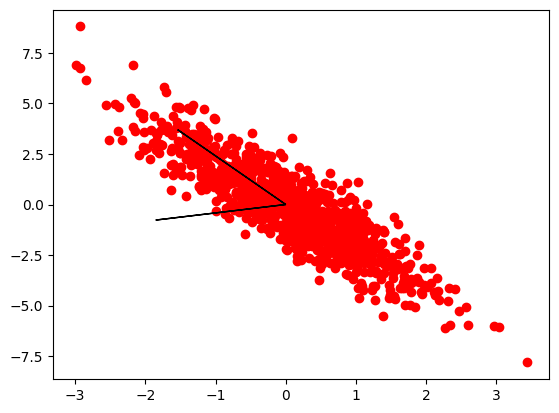

In [39]:
plt.scatter(s[:,0], s[:,1], color='red')
# sns.kdeplot(s, shade=False, color='g')

U, S, VT = svd(s, full_matrices=False)
plt.arrow(0, 0, 4 * VT[0, 0], 4 * VT[0, 1])
plt.arrow(0, 0, 2 * VT[1, 0], 2 * VT[1, 1])

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Найдем характеристический многочлен:
$$(1 - \lambda)(5 - \lambda) - (-2) \cdot (-2) = \lambda^2 - 6\lambda + 1$$

Найдем собственные значения: \\
$$\lambda^2 - 6\lambda + 1 = 0.$$
Применим формулу для нахождения корней квадратного уравнения:
$$\lambda_1 = 3 + \sqrt{8}$$ \\
$$\lambda_2 = 3 - \sqrt{8}$$ \\

Найдем собственные векторы: \\
применим формулу:
$$\begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix} \begin{pmatrix}
v_1 \\ v_2
\end{pmatrix} = \begin{pmatrix}
\lambda_1v_1 \\ \lambda_2v_2
\end{pmatrix}.$$
Посчитаем:
$$1/\sqrt{4+\sqrt{8}} \begin{pmatrix}
1 + \sqrt{2} \\ 1
\end{pmatrix}$$
$$1/\sqrt{4-\sqrt{8}} \begin{pmatrix}
1 - \sqrt{2} \\ 1
\end{pmatrix}$$ \\

Оси совпадают с направлениями cобственных векторов.


Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

<ipython-input-40-1d8b0b5c008c>:1: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)
<ipython-input-40-1d8b0b5c008c>:2: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)


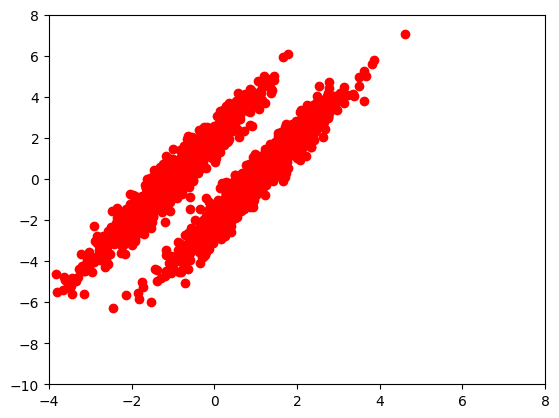

In [40]:
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)

plt.xlim(-4, 8)
plt.ylim(-10, 8)

plt.scatter(s1[:,0], s1[:,1], color='red')
plt.scatter(s2[:,0], s2[:,1], color='red')

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

<ipython-input-41-c151a76401d9>:1: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)
<ipython-input-41-c151a76401d9>:2: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)


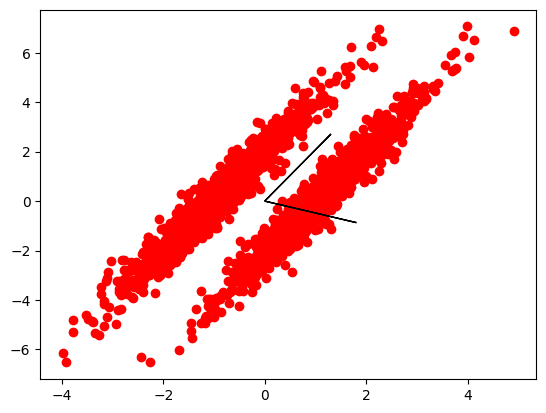

In [41]:
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[0.9, 2.01], [2.01, 4.2]]), size=1000)
s = s1 + s2

plt.scatter(s1[:,0], s1[:,1], color='red')
plt.scatter(s2[:,0], s2[:,1], color='red')

U, S, VT = svd(s, full_matrices=False)
plt.arrow(0, 0, 3 * VT[0, 0], 3 * VT[0, 1])
plt.arrow(0, 0, 2 * VT[1, 0], 2 * VT[1, 1])

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

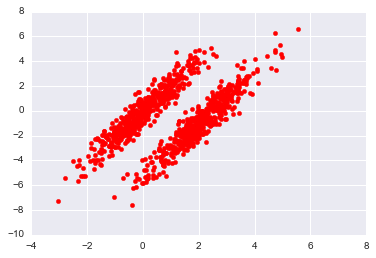

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [42]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Направлениями полуосей эллипса-облака точек будут оси координат, так как матрица ковариаций диагональна, а значит, дисперсии по каждой из осей равны соответствующим элементам на диагонали матрицы. Таким образом, эллипс будет вытянут вдоль осей координат.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

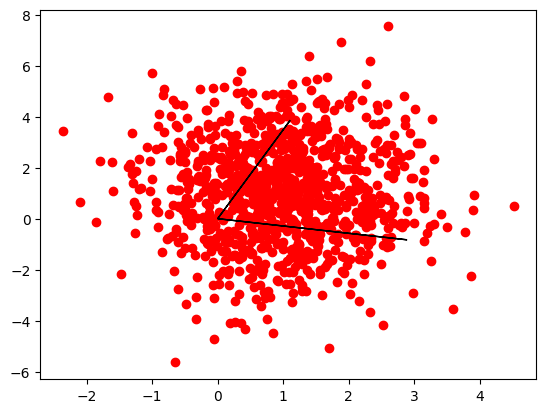

In [43]:
plt.scatter(s[:,0], s[:,1], color='red')

U, S, VT = svd(s, full_matrices=False)
plt.arrow(0, 0, 4 * VT[0, 0], 4 * VT[0, 1])
plt.arrow(0, 0, 3 * VT[1, 0], 3 * VT[1, 1])

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

На графике видно, что направления новых признаков (стрелки) не совпадают с направлениями полуосей эллипса-облака точек, что является проблемой. Это связано с тем, что SVD-разложение находит базис в пространстве признаков, который не обязательно совпадает с базисом в исходном пространстве признаков.

Для исправления этой проблемы можно воспользоваться методом главных компонент (PCA), который также основан на SVD-разложении, но находит новые признаки, которые ортогональны и соответствуют направлениям максимальной дисперсии в данных. Таким образом, направления новых признаков будут совпадать с направлениями полуосей эллипса-облака точек.